In [4]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import warnings


In [65]:
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv(r"sales-cars.csv")
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [6]:
df["Month"]= pd.to_datetime(df.Month)

In [7]:
df.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

In [8]:
df.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [10]:
df.set_index("Month",inplace=True)

In [17]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


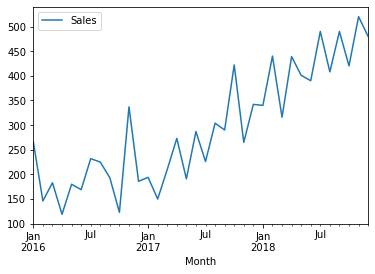

In [12]:
df.plot()

converting the data to a stationary one rather than following a trend line. 

stationary means mean, variance and covariance is constant over all periods

#### doing integrated order that is finding d

In [18]:
difference= df.diff(periods=1)
#integrated of order 1, denoted by d. 1 represents 1 time lag. One important parameter of ARIMA

In [20]:
difference= difference.iloc[1:]
difference.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


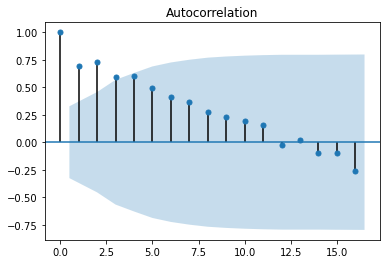

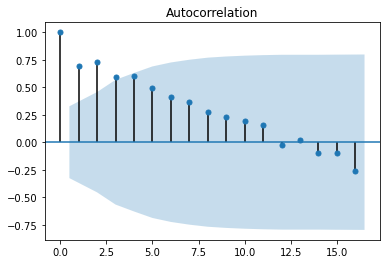

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

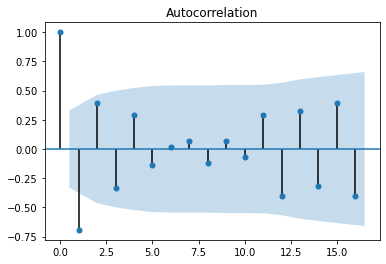

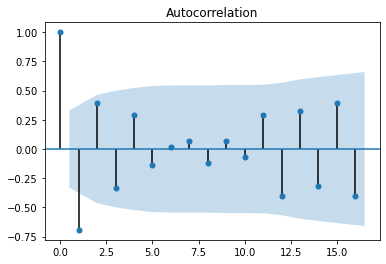

In [22]:
plot_acf(difference)

here the above model is a stationary one as there is a sudden decrease in the graph fromk peak to bottom

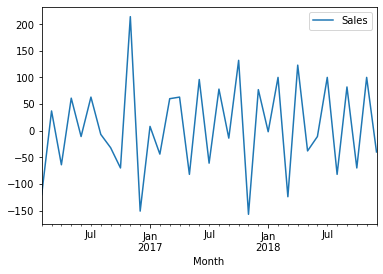

In [23]:
difference.plot()

####  doing auto regression that is finding p

In [24]:
from statsmodels.tsa.ar_model import AR

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
X= df.values
X

array([[266],
       [146],
       [183],
       [119],
       [180],
       [169],
       [232],
       [225],
       [193],
       [123],
       [337],
       [186],
       [194],
       [150],
       [210],
       [273],
       [191],
       [287],
       [226],
       [304],
       [290],
       [422],
       [265],
       [342],
       [340],
       [440],
       [316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

In [27]:
X.size

36

In [29]:
train= X[0:27]
test= X[27:]
predictions= []

In [30]:
model= AR(train)

In [31]:
model_ar_fit= model.fit()

In [73]:
model_ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                          AR(9)   Log Likelihood                 -97.286
Method:                          cmle   S.D. of innovations             53.831
Date:                Wed, 14 Oct 2020   AIC                              9.194
Time:                        14:09:50   BIC                              9.738
Sample:                             0   HQIC                             9.269
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3995    134.939      0.210      0.833    -236.076     292.875
L1.y          -0.1878      0.356     -0.527      0.598      -0.886       0.511
L2.y           0.2629      0.346      0.760      0.447      -0.415       0.941
L3.y           0.2247      0.351      0.640      0.522      -0.464       0.913
L4.y           0.7649      0.349      2.192      0.028       0.081       1.449
L5.y           0.3741      0.405      0.924      0.356      -0.420       1.168
L6.y           0.0565      0.429      0.132      0.895      -0.784       0.897
L7.y          -0.0836      0.431     -0.194      0.846      -0.928       0.761
L8.y          -0.2587      0.443     -0.584      0.559      -1.126       0.609
L9.y          -0.1973      0.400     -0.493      0.622      -0.982       0.587
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0264           -0.0000j            1.0264           -0.0000
AR.2            1.1440           -0.0000j            1.1440           -0.0000
AR.3            0.3086           -1.1149j            1.1568           -0.2070
AR.4            0.3086           +1.1149j            1.1568            0.2070
AR.5           -0.2492           -1.1872j            1.2130           -0.2829
AR.6           -0.2492           +1.1872j            1.2130            0.2829
AR.7           -1.1298           -0.0000j            1.1298           -0.5000
AR.8           -1.2353           -0.6436j            1.3929           -0.4236
AR.9           -1.2353           +0.6436j            1.3929            0.4236
-----------------------------------------------------------------------------
"""

In [59]:
predictions= model_ar_fit.predict(start=27, end=36)
predictions

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544, 429.65174489])

In [60]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

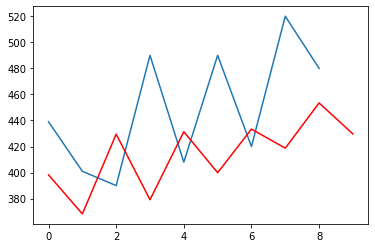

In [61]:
plt.plot(test)
plt.plot(predictions, color="r")

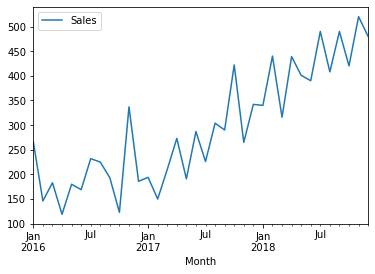

In [39]:
df.plot()

#### ARIMA Model

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
#p,d,q
#p represents the periods taken for autoregressive model
#d represents the integrated order, difference generally taken as 1 or 2
#q represents the periods taken for moving average model that is very similar to auto regressive the maoin difference 
#being use of errors to see the effect

model_arima= ARIMA(train, order=(4, 2, 1))
model_arima_fit= model_arima.fit()

In [69]:
preds= model_arima_fit.forecast(steps=9)[0]

In [70]:
preds

array([419.86218636, 399.60375755, 480.05783346, 431.16699028,
       488.80132886, 488.07661206, 543.45026284, 535.49538069,
       575.01635835])

In [72]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

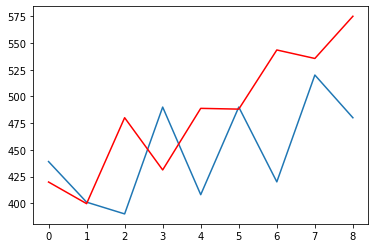

In [71]:
plt.plot(test)
plt.plot(preds, color="r")

In [63]:
import itertools

In [64]:
p=d=q=range(0,5)
pdq= list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [67]:
for param in pdq:
    try:
        model_arima= ARIMA(train, order=param)
        model_arima_fit= model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809391526
(0, 0, 2) 315.2506002917363
(0, 0, 3) nan
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841521501231
(0, 1, 2) 296.3229226907693
(0, 1, 3) 298.31202117389387
(0, 1, 4) 300.33939756179484
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194631255956
(0, 2, 2) 290.39834419503177
(0, 2, 3) 292.98588799339075
(1, 0, 0) 316.1668717522272
(1, 0, 1) 313.0487174504327
(1, 0, 2) 310.9790642221543
(1, 1, 0) 298.83254422710036
(1, 1, 1) 297.12565112584997
(1, 1, 2) 299.47166670627087
(1, 1, 3) 301.2851180947791
(1, 1, 4) 299.9787323970877
(1, 2, 0) 306.53077675709085
(2, 0, 0) 310.996957363064
(2, 0, 1) 339.482205421544
(2, 1, 0) 300.208956123997
(2, 1, 1) 297.9999930167353
(2, 1, 2) 298.5505428130233
(2, 1, 3) 302.872082501565
(2, 2, 0) 306.2975856434524
(3, 0, 0) 312.9838587426122
(3, 0, 1) 335.2659117398438
(3, 1, 0) 294.85435842192754
(3, 1, 1) 295.99793534184096
(3, 1, 2) 292.6686238694405
(3, 1, 3) 294.65889075172464
(3, 2, 0) 2